<AxesSubplot:>

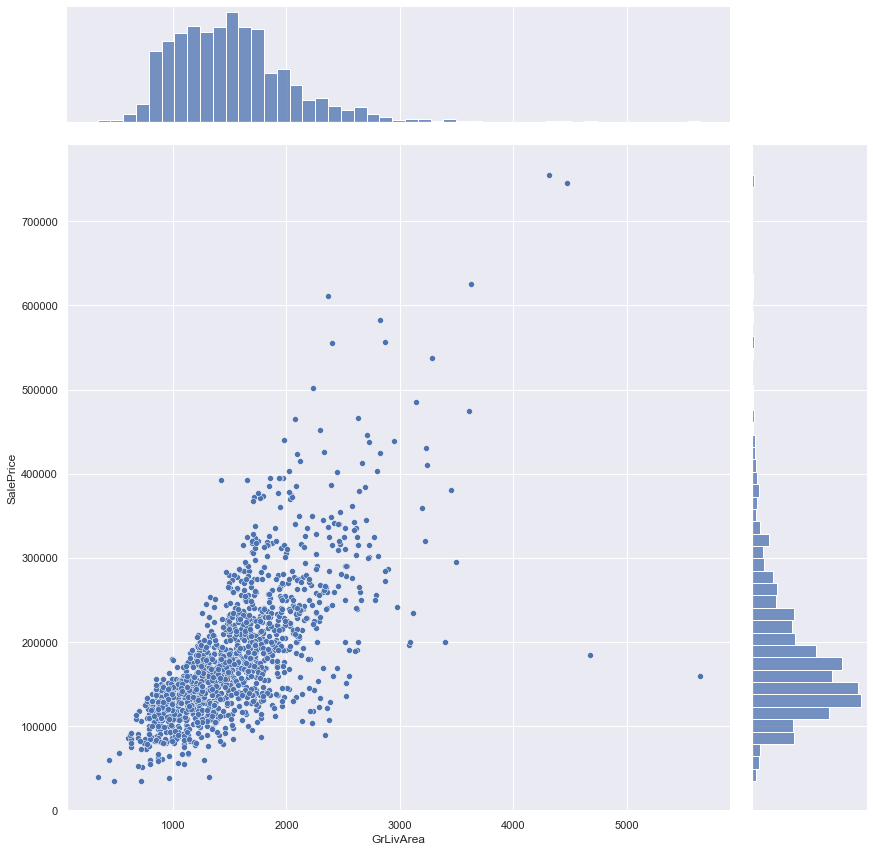

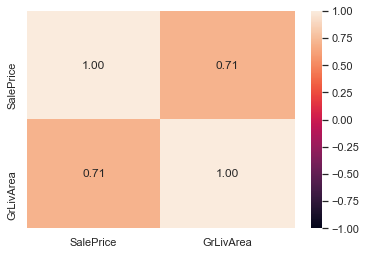

In [55]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
dat = pd.read_csv('train.csv')
sPrice = dat['SalePrice']
GrArea = dat['GrLivArea']
jointDF = pd.concat([sPrice, GrArea], axis = 1).reindex(GrArea.index)

sb.jointplot(data = jointDF, x = "GrLivArea", y = "SalePrice", height = 12)
plt.figure()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]
          GrLivArea
0     204249.387219
1     153226.889232
2     212904.989556
3     205046.613750
4     259827.465383
...             ...
1095  159149.143463
1096  163818.613144
1097  133410.115460
1098  160288.038507
1099  191835.431235

[1100 rows x 1 columns]


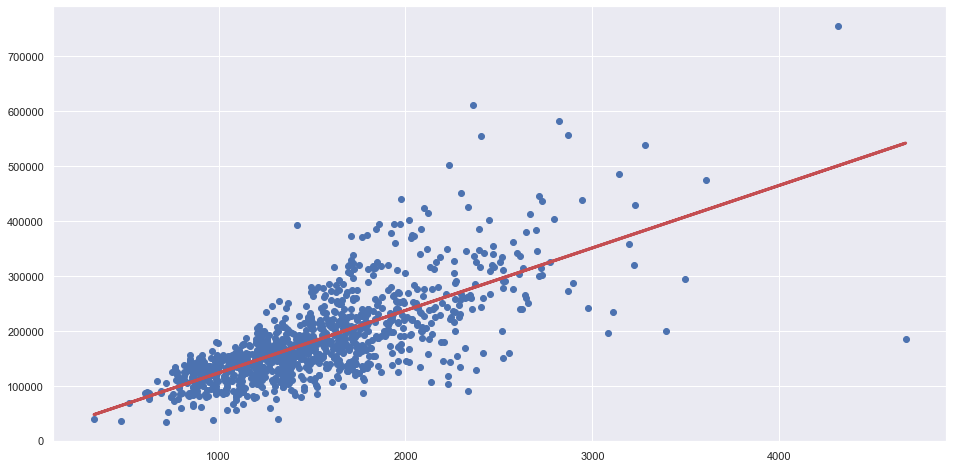

In [56]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
#make random sets
#jointDF = jointDF.sample(frac=1).reset_index(drop=True)
gr_train = pd.DataFrame(jointDF['GrLivArea'][:1100])
gr_test = pd.DataFrame(jointDF['GrLivArea'][-360:])
sp_train = pd.DataFrame(jointDF['SalePrice'][:1100])
sp_test = pd.DataFrame(jointDF['SalePrice'][-360:])
trainDF = pd.concat([gr_train, sp_train], axis = 1).reindex(sp_train.index)
linreg.fit(gr_train, sp_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = gr_train
regline_y = linreg.intercept_ + linreg.coef_ * gr_train
#print(regline_x)
print(regline_y)
f = plt.figure(figsize=(16, 8))
plt.scatter(gr_train, sp_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

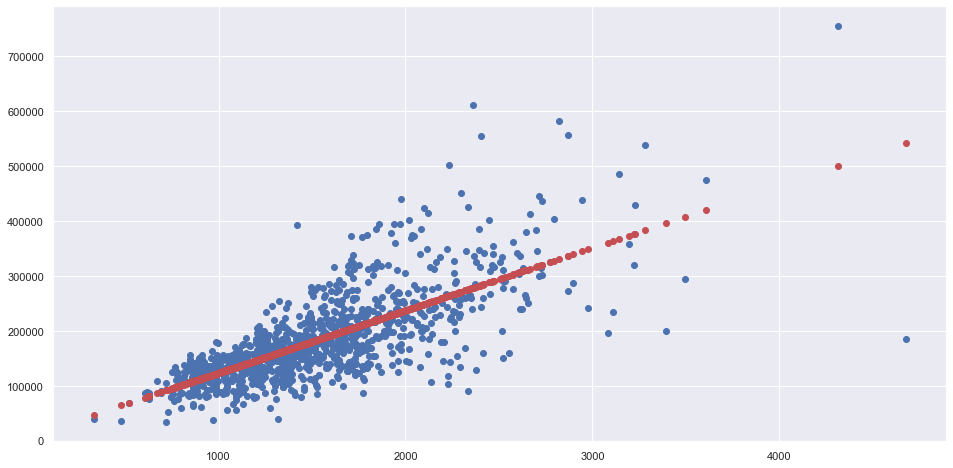

In [44]:
sp_train_pred = linreg.predict(gr_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gr_train, sp_train)
plt.scatter(gr_train, sp_train_pred, color = "r")
plt.show()

In [45]:
print("Explained Variance (R^2) \t:", linreg.score(gr_train, sp_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(sp_train, total_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 9960404252.262455
Root Mean Squared Error (RMSE) 	: 99801.82489444998


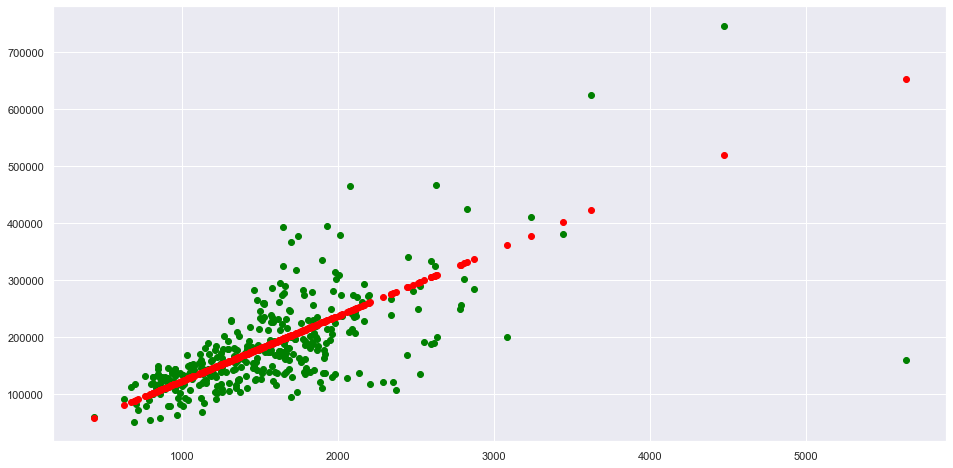

In [46]:
# Predict Total values corresponding to SalePrice Test
sp_test_pred = linreg.predict(gr_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(gr_test, sp_test, color = "green")
plt.scatter(gr_test, sp_test_pred, color = "red")
plt.show()

In [47]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(gr_test, sp_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(gr_test, sp_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.40117720006925794
Mean Squared Error (MSE) 	: 37685396017.877754
Root Mean Squared Error (RMSE) 	: 194127.26757948703


<AxesSubplot:>

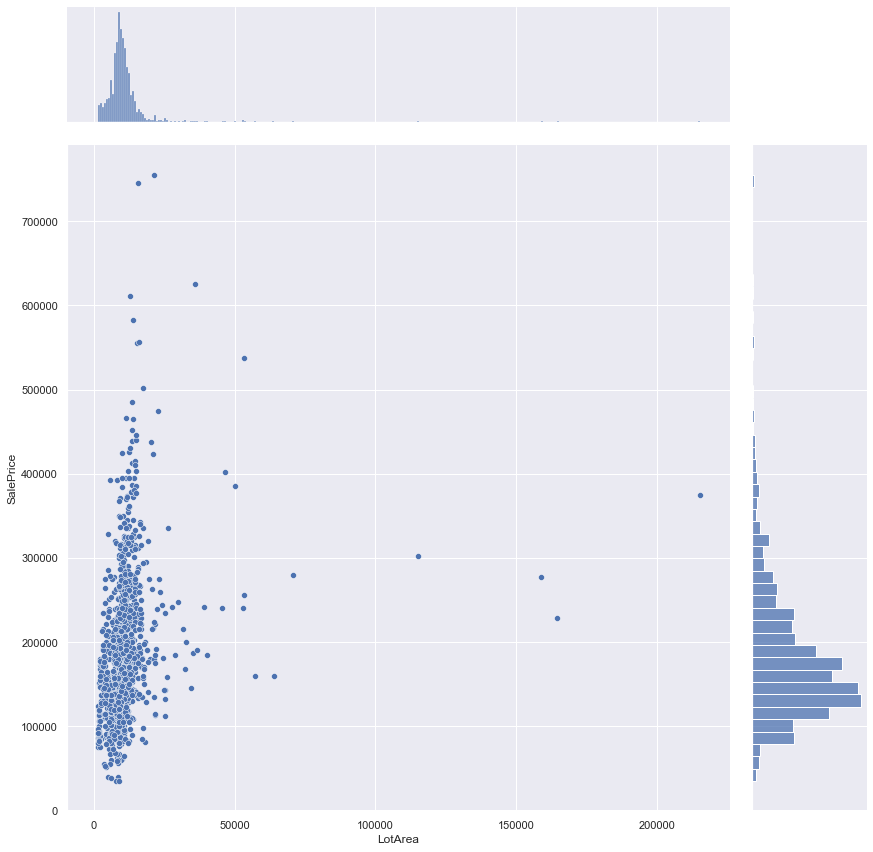

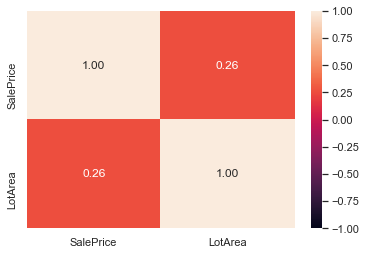

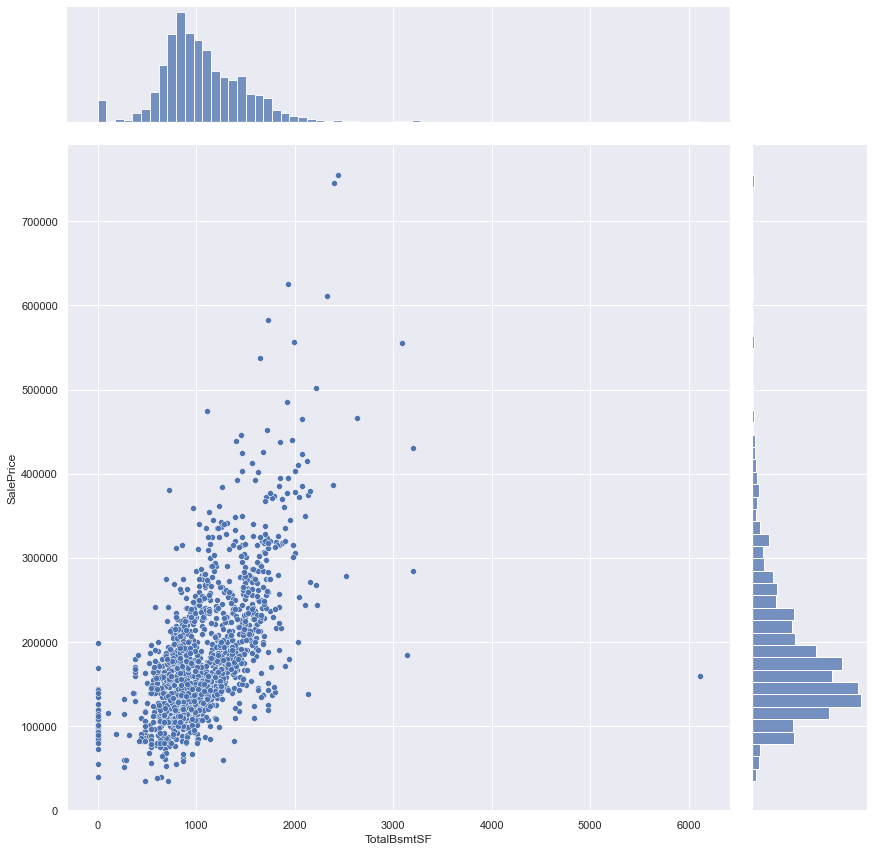

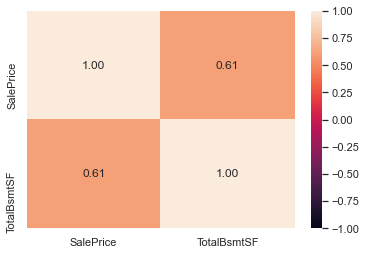

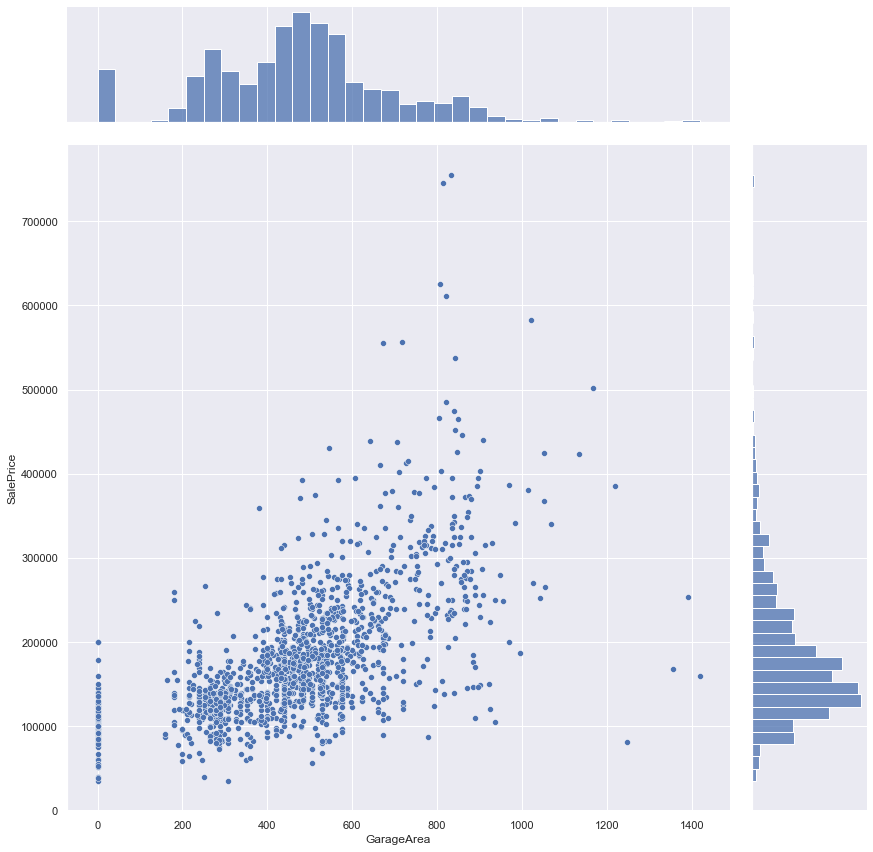

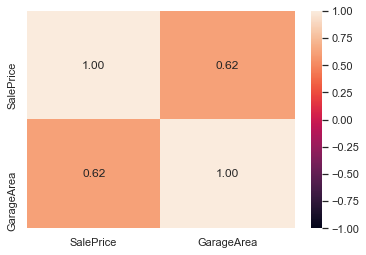

In [53]:
LotArea = dat['LotArea']
bsmt = dat['TotalBsmtSF']
GarageArea = dat['GarageArea']
jointDF = pd.concat([sPrice, LotArea], axis = 1).reindex(LotArea.index)
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)
plt.figure()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
jointDF = pd.concat([sPrice, bsmt], axis = 1).reindex(bsmt.index)
sb.jointplot(data = jointDF, x = "TotalBsmtSF", y = "SalePrice", height = 12)
plt.figure()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
jointDF = pd.concat([sPrice, GarageArea], axis = 1).reindex(GarageArea.index)
sb.jointplot(data = jointDF, x = "GarageArea", y = "SalePrice", height = 12)
plt.figure()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")


Intercept 	: b =  [160963.95370929]
Coefficients 	: a =  [[1.91881242]]


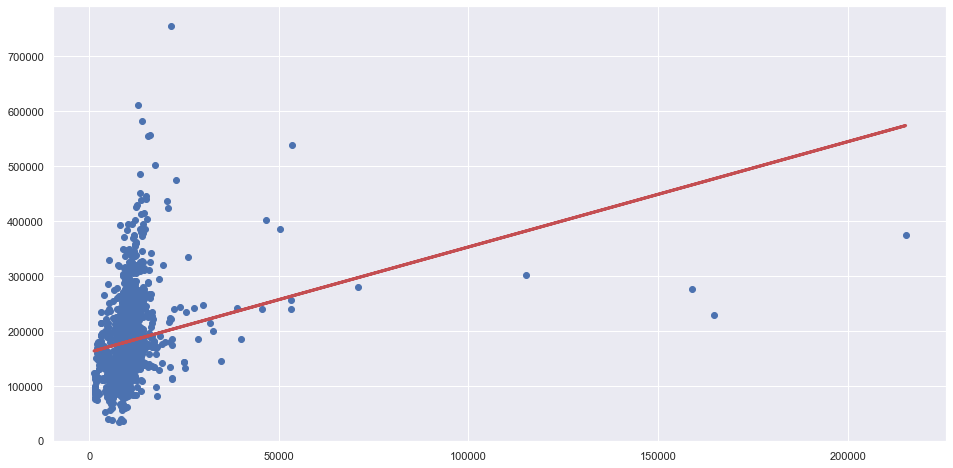

Intercept 	: b =  [54361.70161283]
Coefficients 	: a =  [[120.19979559]]


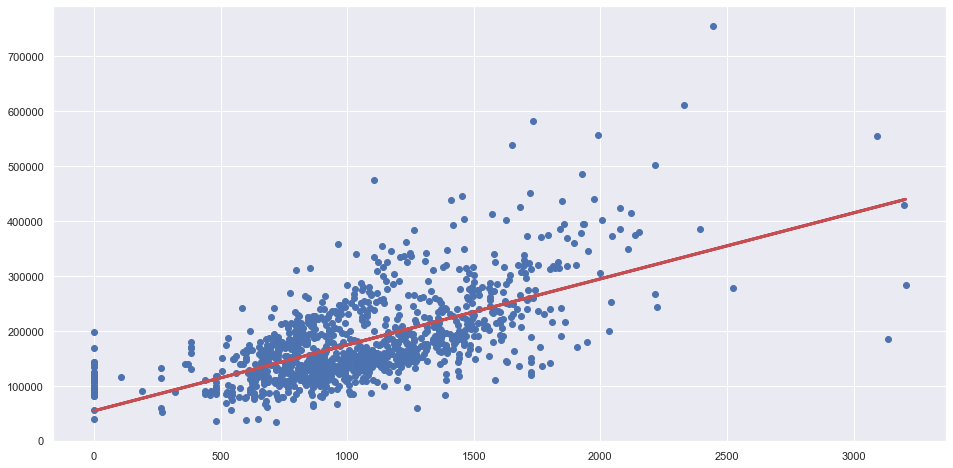

Intercept 	: b =  [67131.98072434]
Coefficients 	: a =  [[241.42776434]]


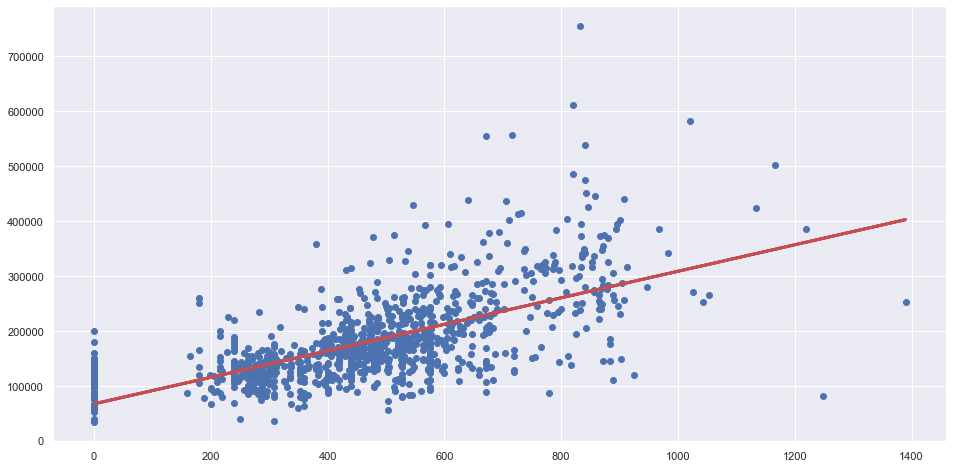

In [64]:
linreg = LinearRegression()
#make random sets
#jointDF = jointDF.sample(frac=1).reset_index(drop=True)
la_train = pd.DataFrame(dat['LotArea'][:1100])
la_test = pd.DataFrame(dat['LotArea'][-360:])
bs_train = pd.DataFrame(dat['TotalBsmtSF'][:1100])
bs_test = pd.DataFrame(dat['TotalBsmtSF'][-360:])
ga_train = pd.DataFrame(dat['GarageArea'][:1100])
ga_test = pd.DataFrame(dat['GarageArea'][-360:])
trainDF = pd.concat([la_train, sp_train], axis = 1).reindex(sp_train.index)
linreg.fit(la_train, sp_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = la_train
regline_y = linreg.intercept_ + linreg.coef_ * la_train
f = plt.figure(figsize=(16, 8))
plt.scatter(la_train, sp_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

trainDF = pd.concat([bs_train, sp_train], axis = 1).reindex(bs_train.index)
linreg.fit(bs_train, sp_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = bs_train
regline_y = linreg.intercept_ + linreg.coef_ * bs_train
f = plt.figure(figsize=(16, 8))
plt.scatter(bs_train, sp_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

trainDF = pd.concat([ga_train, sp_train], axis = 1).reindex(ga_train.index)
linreg.fit(ga_train, sp_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = ga_train
regline_y = linreg.intercept_ + linreg.coef_ * ga_train
f = plt.figure(figsize=(16, 8))
plt.scatter(ga_train, sp_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

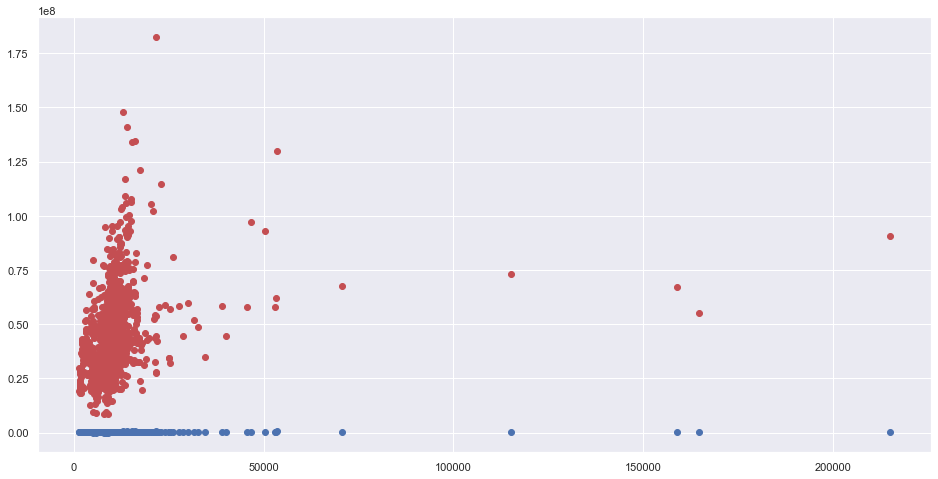

In [67]:
sp_train_pred = linreg.predict(sp_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(la_train, sp_train)
plt.scatter(la_train, sp_train_pred, color = "r")
plt.show()